### Testing different assignment algorithms

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src import ps
import time
import matplotlib.pyplot as plt
import numpy as np

co = ['lightcoral', 'yellow', 'plum', 'grey', 'royalblue', 'maroon', 'coral', 'g', 'red', 'sienna']

In [3]:
ss = ps.Schedule()
ss.load_data(2)

In [4]:
tb0, ts0, tf0 = ss.first_assignment(0)

In [5]:
tb1, ts1, tf1 = ss.assign_new_request_og(tb0, ts0, tf0, 1, True)
tb2, ts2, tf2 = ss.assign_new_request_og(tb1, ts1, tf1, 2, True)

In [113]:
tb1_b, ts1_b, tf1_b = ss.assign_new_request_v2(tb0, ts0, tf0, 1, False)
tb2_b, ts2_b, tf2_b = ss.assign_new_request_v2(tb1_b, ts1_b, tf1_b, 2, False)

[149. 175.   0.   0.   0.   0.   0.   0.   0.   0.]
[204. 230. 270.   0.   0.   0.   0.   0.   0.   0.]
[227. 253. 293. 345.   0.   0.   0.   0.   0.   0.]
[270. 293.   0.   0.   0.   0.   0.   0.   0.   0.]


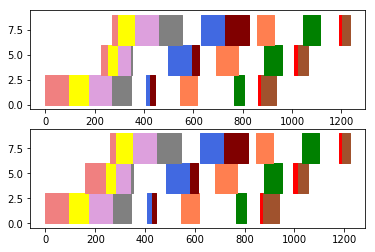

In [110]:
fig, ax = plt.subplots(nrows=2)

ax[0].broken_barh(ss.compute_Vb(tb0, ts0, tf0), yrange=(0,3), color=co)
ax[0].broken_barh(ss.compute_Vb(tb1, ts1, tf1), yrange=(3,3), color=co)
ax[0].broken_barh(ss.compute_Vb(tb2, ts2, tf2), yrange=(6,3), color=co)

ax[1].broken_barh(ss.compute_Vb(tb0, ts0, tf0), yrange=(0,3), color=co)
ax[1].broken_barh(ss.compute_Vb(tb1_b, ts1_b, tf1_b), yrange=(3,3), color=co)
ax[1].broken_barh(ss.compute_Vb(tb2_b, ts2_b, tf2_b), yrange=(6,3), color=co)


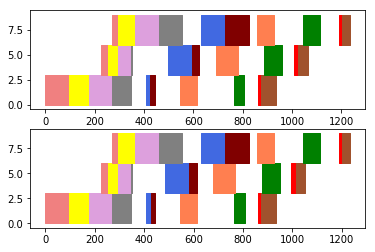

In [114]:
fig, ax = plt.subplots(nrows=2)

ax[0].broken_barh(ss.compute_Vb(tb0, ts0, tf0), yrange=(0,3), color=co)
ax[0].broken_barh(ss.compute_Vb(tb1, ts1, tf1), yrange=(3,3), color=co)
ax[0].broken_barh(ss.compute_Vb(tb2, ts2, tf2), yrange=(6,3), color=co)

ax[1].broken_barh(ss.compute_Vb(tb0, ts0, tf0), yrange=(0,3), color=co)
ax[1].broken_barh(ss.compute_Vb(tb1_b, ts1_b, tf1_b), yrange=(3,3), color=co)
ax[1].broken_barh(ss.compute_Vb(tb2_b, ts2_b, tf2_b), yrange=(6,3), color=co)


In [31]:
tb, ts, tf, order = ss.assign_all(0, 1)

In [7]:
%%timeit

ss.assign_new_request(tb0, ts0, tf0, 1, True)

165 µs ± 7.79 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [91]:
%%timeit

ss.assign_new_request_og(tb0, ts0, tf0, 1, True)

290 µs ± 17.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [236]:
%%timeit

ss.assign_new_request_v2(tb0, ts0, tf0, 3, False)

80.2 µs ± 1.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [90]:
%timeit ss.assign_all(1, 0)

62.2 ms ± 1.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [266]:

start = time.time()
clock = 0

best = 5000

cnt = 0

while best > 3062 and clock < 60:
    
    first = np.random.randint(0, ss.N)
    order = [first]

    tb0, ts0, tf0 = ss.first_assignment(first)

    ds = np.zeros(shape=(ss.N))
    ds_keys = np.zeros(shape=(ss.N))

    unused_requests = set(range(ss.N)) - {first}

    _tb = [None for _ in range(ss.N)]
    _ts = [None for _ in range(ss.N)]
    _tf = [None for _ in range(ss.N)]

    i_add = int(first)

    _tb[int(i_add)], _ts[int(i_add)], _tf[int(i_add)] = tb0.copy(), ts0.copy(), tf0.copy()

    
    while len(unused_requests) > 0:
        ds = np.zeros(shape=(ss.N))
        ds_keys = np.zeros(shape=(ss.N))

        for i in unused_requests:
            tb1, ts1, tf1 = ss.assign_new_request_v2(tb0, ts0, tf0, i, True)
            cnt += 1

            ds[i] = ss.dissimilarity(tb0, ts0, tf0, tb1, ts1, tf1) / tf1
            ds_keys[i] = i

        ds = ds[list(unused_requests)]
        ds_keys = ds_keys[list(unused_requests)]
        dss = ds_keys[ds < 0.8]

        if len(dss) > 0:
            i_add = int(np.random.choice(dss))
        else:
            i_add = i


        unused_requests -= {i_add}
        order.append(i_add)

        _tb[i_add], _ts[i_add], _tf[i_add] = ss.assign_new_request_v2(tb0, ts0, tf0, int(i_add), True)
        tb0, ts0, tf0 = _tb[i_add].copy(), _ts[i_add].copy(), _tf[i_add].copy()
    
    clock = time.time() - start
    
    if max(_tf) < best:
        best = max(_tf)
        print(clock, cnt, max(_tf))
        tb_opt, ts_opt, tf_opt, order_opt = _tb.copy(), _ts.copy(), _tf.copy(), order.copy()


0.08199930191040039 496 3790.0
0.2430431842803955 1488 3504.0
0.3159947395324707 1984 3349.0
1.7471790313720703 11408 3308.0
5.026794195175171 32736 3291.0
5.5579774379730225 36208 3277.0
7.993660926818848 52576 3136.0


KeyboardInterrupt: 

In [263]:
cnt

54064

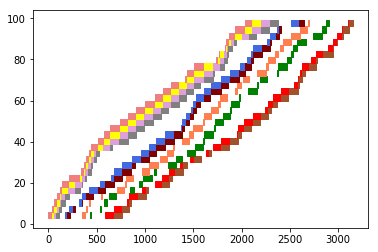

In [251]:
fig, ax = plt.subplots()
pp=0
for i in order_opt:
    pp += 3
    ax.broken_barh(ss.compute_Vb(tb_opt[i], ts_opt[i], tf_opt[i]), yrange=(pp,3), color=co)

In [264]:
ds

array([0.4432042])